In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [104]:
df = pd.read_excel("C:\\Users\\LENOVO.USER\\Documents\\PROYECTO4\\P4_dataset.xlsx")

In [108]:
# Suponiendo que el DataFrame contiene las columnas correctas
df['variacion'] = df['high'] - df['low']
# Agrupar por símbolo de acción y calcular la variación promedio
variacion_promedio = df.groupby('stock_symbol')['variacion'].mean().reset_index()
# Unir con el DataFrame que contiene los nombres de las empresas
df_merged = pd.merge(variacion_promedio, df[['stock_symbol', 'company']].drop_duplicates(), on='stock_symbol')
# Ordenar por menor variación
variacion_promedio = df_merged.sort_values(by='variacion',  ascending=False)
# Mostrar resultados
print(variacion_promedio)

   stock_symbol  variacion                                      company
10         NFLX   7.170208                                Netflix, Inc.
1          ADBE   5.448745                                   Adobe Inc.
8          META   3.751209                         Meta Platforms, Inc.
13         TSLA   3.251921                                  Tesla, Inc.
3           CRM   3.109450                             Salesforce, Inc.
9          MSFT   2.371052                        Microsoft Corporation
11         NVDA   2.363881                           NVIDIA Corporation
6           IBM   2.233506  International Business Machines Corporation
2          AMZN   1.692124                             Amazon.com, Inc.
0          AAPL   1.335170                                   Apple Inc.
5         GOOGL   1.161362                                Alphabet Inc.
12         ORCL   0.915215                           Oracle Corporation
7          INTC   0.854770                            Intel Corp

In [109]:
df = pd.merge(df, variacion_promedio[['stock_symbol', 'variacion']], on='stock_symbol', how='left')

In [110]:
print(df.head())

  stock_symbol     company       date       open       high        low  \
0         AAPL  Apple Inc. 2012-05-18  19.070000  19.407499  18.649286   
1         AAPL  Apple Inc. 2012-05-21  19.089287  20.055000  19.073214   
2         AAPL  Apple Inc. 2012-05-22  20.341070  20.495714  19.735001   
3         AAPL  Apple Inc. 2012-05-23  19.910713  20.457144  19.758215   
4         AAPL  Apple Inc. 2012-05-24  20.566786  20.589287  20.043928   

       close  adj_close     volume  variacion_x  variacion_y  
0  18.942142  16.146616  732292400     0.758213      1.33517  
1  20.045713  17.087326  631106000     0.981786      1.33517  
2  19.891787  16.956108  694870400     0.760713      1.33517  
3  20.377144  17.369843  584897600     0.698929      1.33517  
4  20.190001  17.210320  496230000     0.545359      1.33517  


In [111]:
# Asegurarse de que la columna 'date' esté en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Agregar los datos por año, calculando el retorno anual usando el último precio de cierre ajustado del año
df['anio'] = df['date'].dt.year
annual_data = df.groupby(['company', 'anio'])['adj_close'].last().reset_index()

# Filtrar datos para el rango de años deseado
annual_data = annual_data[(annual_data['anio'] >= 2012) & (annual_data['anio'] <= 2022)]

# Calcular el retorno anual
annual_data['retorno_anual'] = annual_data.groupby('company')['adj_close'].pct_change()

# Calcular la volatilidad (desviación estándar) de los retornos anuales por empresa
volatilidad_anual = annual_data.groupby('company')['retorno_anual'].std().reset_index()

# Renombrar la columna para mayor claridad
volatilidad_anual.rename(columns={'retorno_anual': 'volatilidad_anual'}, inplace=True)

# Ordenar las empresas por volatilidad anual descendente
volatilidad_anual = volatilidad_anual.sort_values(by='volatilidad_anual', ascending=False)

# Mostrar las empresas con mayor volatilidad anual
print(volatilidad_anual)

                                        company  volatilidad_anual
13                                  Tesla, Inc.           2.452468
10                                Netflix, Inc.           0.980475
9                            NVIDIA Corporation           0.808663
2                              Amazon.com, Inc.           0.492230
7                          Meta Platforms, Inc.           0.467862
3                                    Apple Inc.           0.383064
1                                 Alphabet Inc.           0.327271
0                                    Adobe Inc.           0.318340
12                             Salesforce, Inc.           0.289706
5                             Intel Corporation           0.272614
8                         Microsoft Corporation           0.250738
4                           Cisco Systems, Inc.           0.194377
11                           Oracle Corporation           0.167194
6   International Business Machines Corporation           0.16

In [112]:
df = pd.merge(df, volatilidad_anual, on='company', how='left')

In [113]:
print(df.head())

  stock_symbol     company       date       open       high        low  \
0         AAPL  Apple Inc. 2012-05-18  19.070000  19.407499  18.649286   
1         AAPL  Apple Inc. 2012-05-21  19.089287  20.055000  19.073214   
2         AAPL  Apple Inc. 2012-05-22  20.341070  20.495714  19.735001   
3         AAPL  Apple Inc. 2012-05-23  19.910713  20.457144  19.758215   
4         AAPL  Apple Inc. 2012-05-24  20.566786  20.589287  20.043928   

       close  adj_close     volume  variacion_x  variacion_y  anio  \
0  18.942142  16.146616  732292400     0.758213      1.33517  2012   
1  20.045713  17.087326  631106000     0.981786      1.33517  2012   
2  19.891787  16.956108  694870400     0.760713      1.33517  2012   
3  20.377144  17.369843  584897600     0.698929      1.33517  2012   
4  20.190001  17.210320  496230000     0.545359      1.33517  2012   

   volatilidad_anual  
0           0.383064  
1           0.383064  
2           0.383064  
3           0.383064  
4           0.38306

In [114]:
# Definir un umbral para considerar un volumen como "alto" (por ejemplo, el percentil 75 del volumen total)
volume_threshold = df['volume'].quantile(0.75)

# Calcular la proporción de días en los que el volumen de cada empresa supera el umbral
volumen_negociacion = df[df['volume'] > volume_threshold].groupby('company').size() / df.groupby('company').size()

# Ordenar las empresas por consistencia en volumen alto de mayor a menor
volumen_negociacion_sorted = volume_negociacion.sort_values(ascending=False)

# Mostrar las empresas con alta consistencia en volumen de negociación elevado
print("Empresas con alta consistencia en volumen de negociación elevado:")
print(volumen_negociacion_sorted.head(14))  # Cambia el número para mostrar más o menos empresas

Empresas con alta consistencia en volumen de negociación elevado:
company
Apple Inc.                                     0.994010
Tesla, Inc.                                    0.805691
Amazon.com, Inc.                               0.780981
NVIDIA Corporation                             0.277424
Alphabet Inc.                                  0.262823
Meta Platforms, Inc.                           0.129914
Microsoft Corporation                          0.098465
Intel Corporation                              0.070760
Cisco Systems, Inc.                            0.046799
Netflix, Inc.                                  0.021715
Oracle Corporation                             0.010857
Salesforce, Inc.                               0.000749
Adobe Inc.                                          NaN
International Business Machines Corporation         NaN
dtype: float64


In [115]:
df = pd.merge(df, volumen_negociacion.to_frame('volumen_negociacion'), left_on='company', right_index=True, how='left')

In [116]:
print(df.head())

  stock_symbol     company       date       open       high        low  \
0         AAPL  Apple Inc. 2012-05-18  19.070000  19.407499  18.649286   
1         AAPL  Apple Inc. 2012-05-21  19.089287  20.055000  19.073214   
2         AAPL  Apple Inc. 2012-05-22  20.341070  20.495714  19.735001   
3         AAPL  Apple Inc. 2012-05-23  19.910713  20.457144  19.758215   
4         AAPL  Apple Inc. 2012-05-24  20.566786  20.589287  20.043928   

       close  adj_close     volume  variacion_x  variacion_y  anio  \
0  18.942142  16.146616  732292400     0.758213      1.33517  2012   
1  20.045713  17.087326  631106000     0.981786      1.33517  2012   
2  19.891787  16.956108  694870400     0.760713      1.33517  2012   
3  20.377144  17.369843  584897600     0.698929      1.33517  2012   
4  20.190001  17.210320  496230000     0.545359      1.33517  2012   

   volatilidad_anual  volumen_negociacion  
0           0.383064              0.99401  
1           0.383064              0.99401  
2 

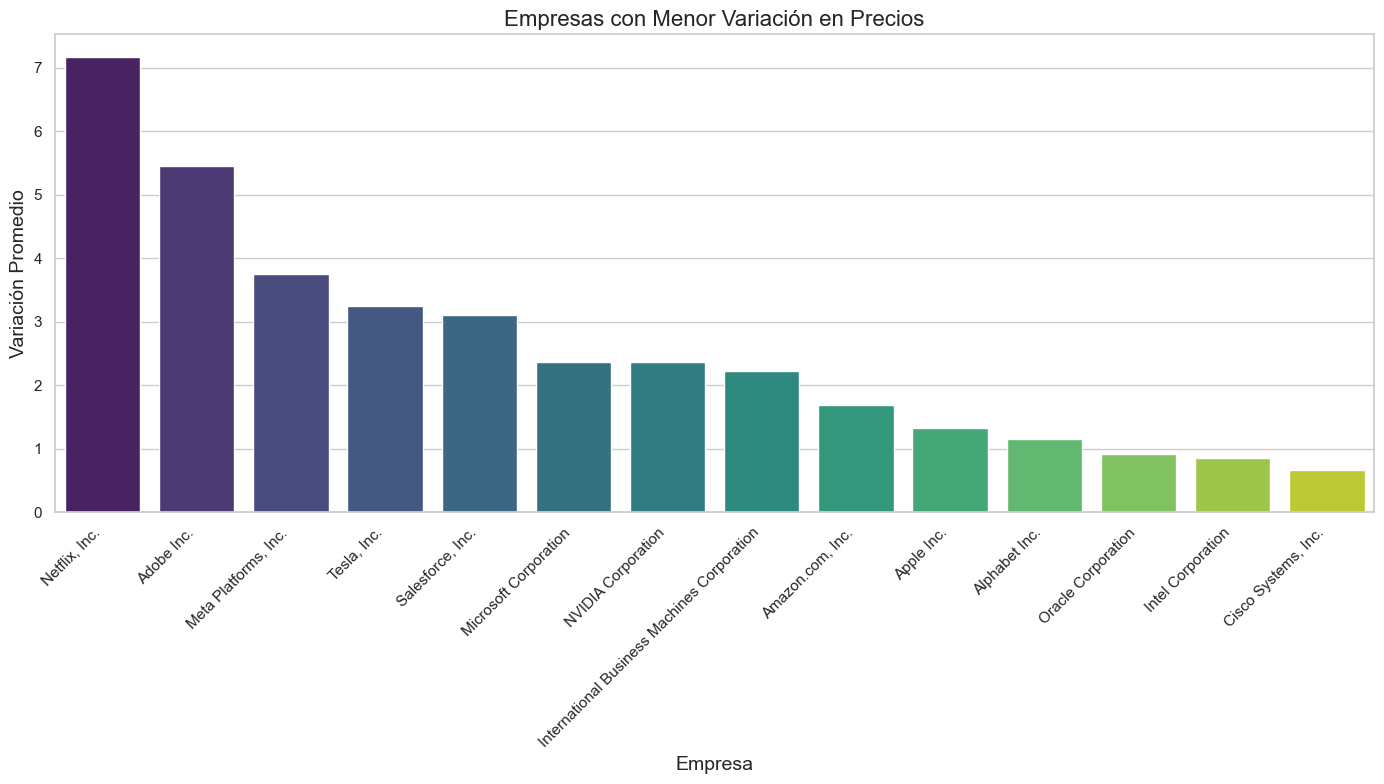

In [117]:
# Crear una figura y un eje
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras de volatilidad anual
sns.barplot(x='company', y='variacion', hue='company', data=variacion_promedio, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Empresas con Menor Variación en Precios', fontsize=16)
plt.xlabel('Empresa', fontsize=14)
plt.ylabel('Variación Promedio', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para evitar el recorte de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

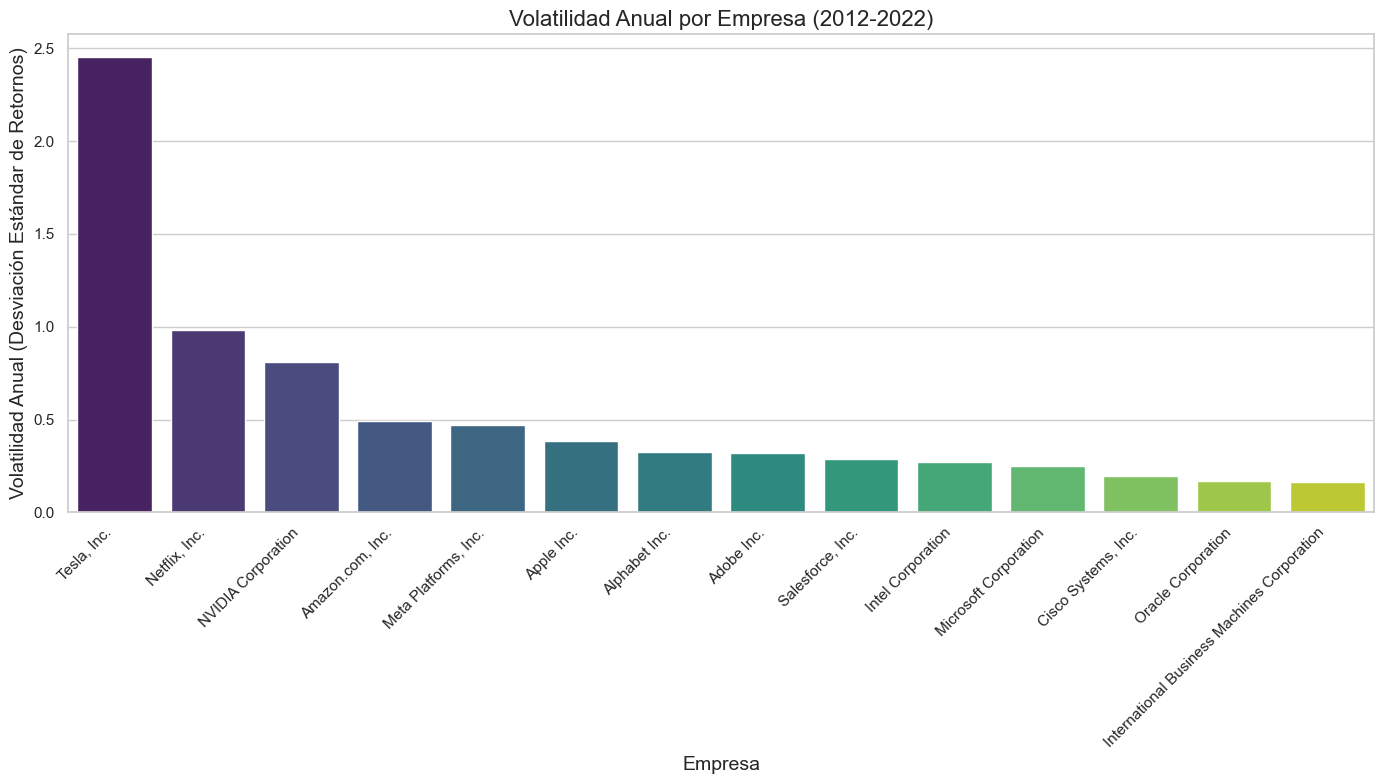

In [118]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura y un eje
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras de volatilidad anual
sns.barplot(x='company', y='volatilidad_anual', hue='company', data=volatilidad_anual, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Volatilidad Anual por Empresa (2012-2022)', fontsize=16)
plt.xlabel('Empresa', fontsize=14)
plt.ylabel('Volatilidad Anual (Desviación Estándar de Retornos)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para evitar el recorte de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

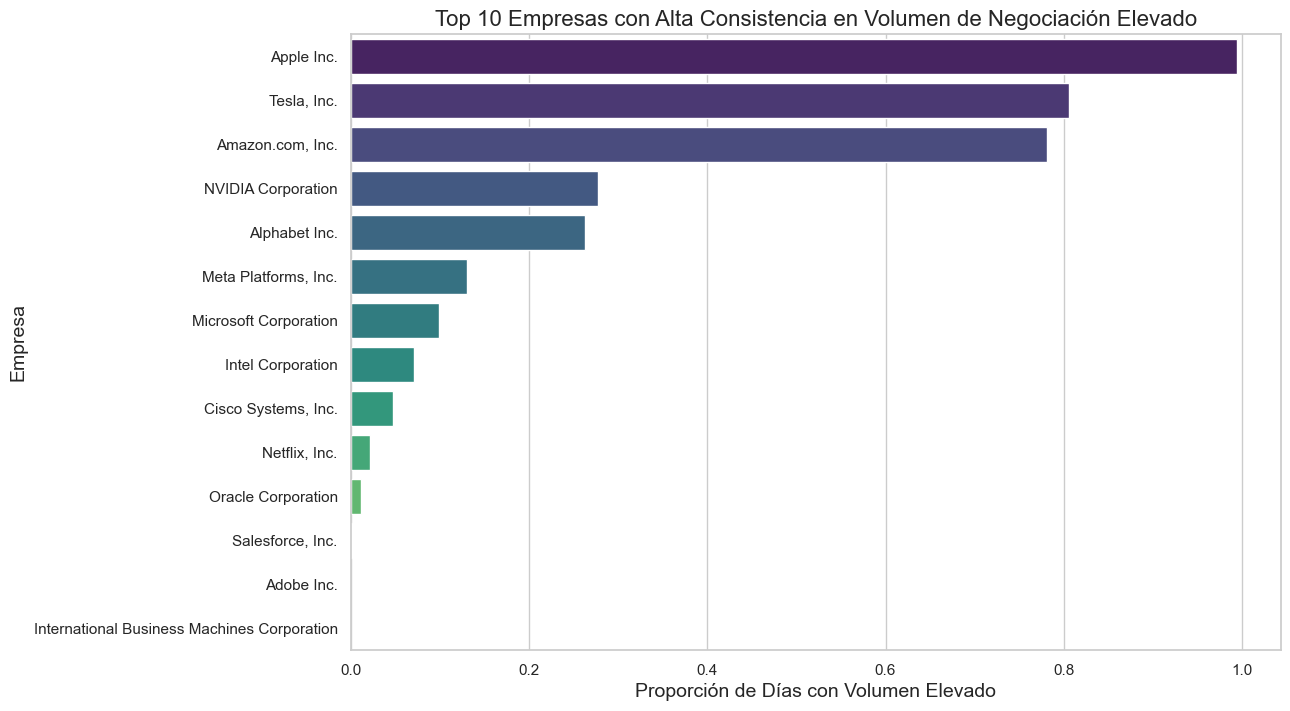

In [119]:
# Configurar el tamaño de la gráfica
plt.figure(figsize=(12, 8))

# Crear la gráfica de barras
sns.barplot(x=volumen_negociacion_sorted.values, y=volumen_negociacion_sorted.index, hue=volumen_negociacion_sorted.index, palette='viridis')

# Títulos y etiquetas
plt.title('Top 10 Empresas con Alta Consistencia en Volumen de Negociación Elevado', fontsize=16)
plt.xlabel('Proporción de Días con Volumen Elevado', fontsize=14)
plt.ylabel('Empresa', fontsize=14)

# Mostrar la gráfica
plt.show()

In [120]:
# Calcular el percentil 75 para cada variable
p75_variacion = df['variacion_y'].quantile(0.75)
p75_volatilidad = df['volatilidad_anual'].quantile(0.75)
p75_volumen = df['volumen_negociacion'].quantile(0.75)
# Función para clasificar según el criterio de percentiles
def clasificar_percentil(row):
    # Condición para ser clasificada como Riesgosa: debe estar en el percentil 75 o superior en todas las variables
    if (row['variacion_y'] >= p75_variacion) and (row['volatilidad_anual'] >= p75_volatilidad) and (row['volumen_negociacion'] >= p75_volumen):
        return 'Riesgosa'
    elif (row['variacion_y'] >= p75_variacion) or (row['volatilidad_anual'] >= p75_volatilidad) or (row['volumen_negociacion'] >= p75_volumen):
        # Si cumple solo en una o dos variables el percentil 75, se considera Moderada
        return 'Moderada'
    else:
        # Si no cumple con el percentil 75 en ninguna variable, es Estable
        return 'Estable'

In [121]:
# Aplicar la función de clasificación a cada fila del DataFrame
df['clasificacion'] = df.apply(clasificar_percentil, axis=1)

In [122]:
# Crear clasificacion_por_empresa
clasificacion_por_empresa = df.groupby('company')['clasificacion'].agg(pd.Series.mode).reset_index()
clasificacion_por_empresa.rename(columns={'clasificacion': 'clasificacion_general'}, inplace=True)

# Asegúrate de que clasificacion_general está definido
clasificacion_general = clasificacion_por_empresa['clasificacion_general'].value_counts()


# Mostrar la clasificación general por empresa
print(clasificacion_por_empresa)

                                        company clasificacion_general
0                                    Adobe Inc.              Moderada
1                                 Alphabet Inc.               Estable
2                              Amazon.com, Inc.              Moderada
3                                    Apple Inc.              Moderada
4                           Cisco Systems, Inc.               Estable
5                             Intel Corporation               Estable
6   International Business Machines Corporation               Estable
7                          Meta Platforms, Inc.              Moderada
8                         Microsoft Corporation               Estable
9                            NVIDIA Corporation              Moderada
10                                Netflix, Inc.              Moderada
11                           Oracle Corporation               Estable
12                             Salesforce, Inc.               Estable
13                  

In [123]:
# Combinar el DataFrame original con la clasificación general por empresa
df = df.merge(clasificacion_por_empresa, on='company', how='left')

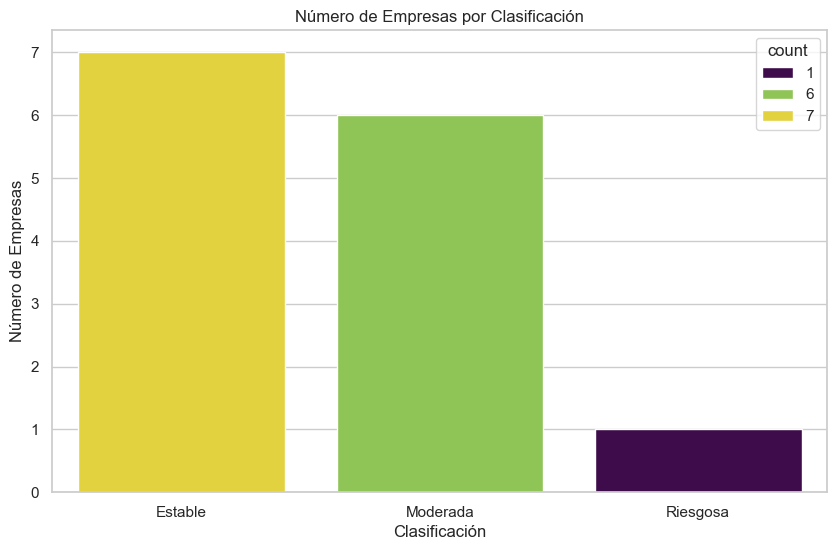

In [126]:
# Obtener el conteo de cada clasificación
clasificacion_general = clasificacion_por_empresa['clasificacion_general'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=clasificacion_general.index, y=clasificacion_general.values, hue=clasificacion_general, palette='viridis')
plt.title('Número de Empresas por Clasificación')
plt.xlabel('Clasificación')
plt.ylabel('Número de Empresas')
plt.show()



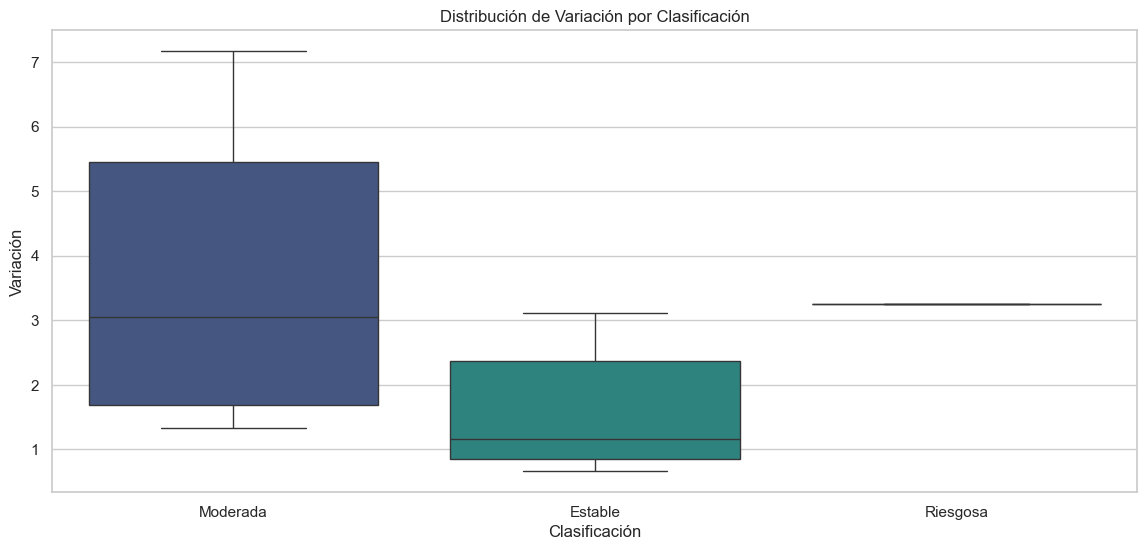

In [128]:
# Gráfico de caja para la variación
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='clasificacion', y='variacion_y', hue='clasificacion', palette='viridis')
plt.title('Distribución de Variación por Clasificación')
plt.xlabel('Clasificación')
plt.ylabel('Variación')
plt.show()

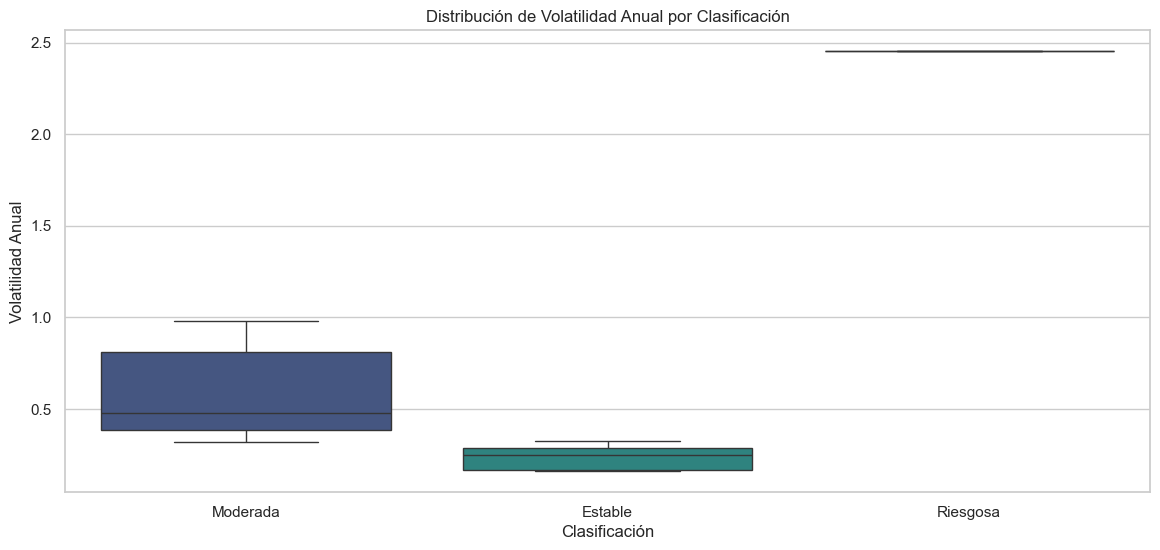

In [129]:
# Gráfico de caja para la volatilidad
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='clasificacion', y='volatilidad_anual', hue='clasificacion', palette='viridis')
plt.title('Distribución de Volatilidad Anual por Clasificación')
plt.xlabel('Clasificación')
plt.ylabel('Volatilidad Anual')
plt.show()

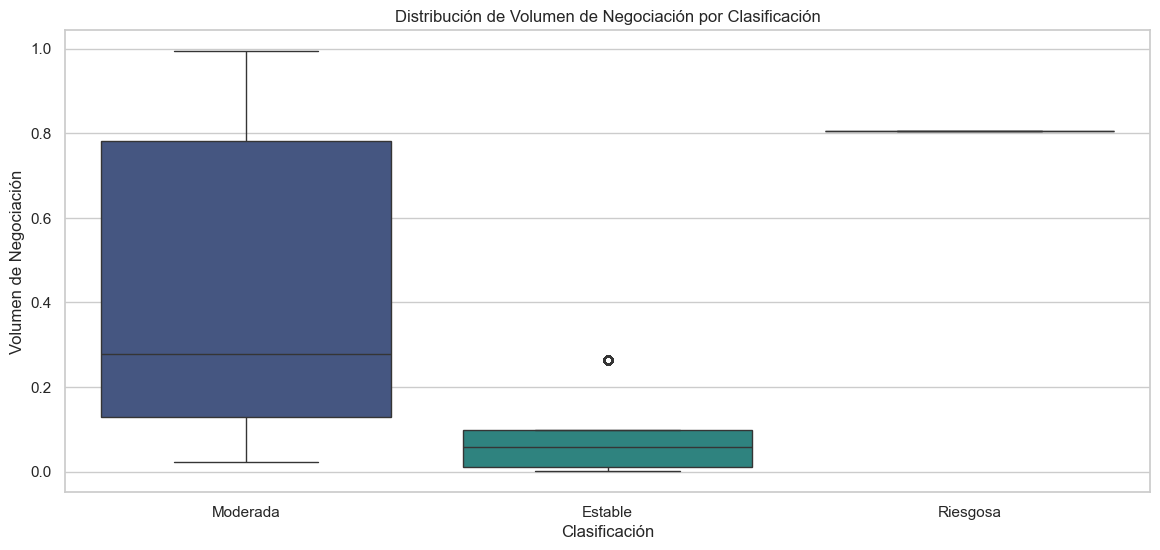

In [130]:
# Gráfico de caja para el volumen de negociación
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='clasificacion', y='volumen_negociacion', hue='clasificacion', palette='viridis')
plt.title('Distribución de Volumen de Negociación por Clasificación')
plt.xlabel('Clasificación')
plt.ylabel('Volumen de Negociación')
plt.show()


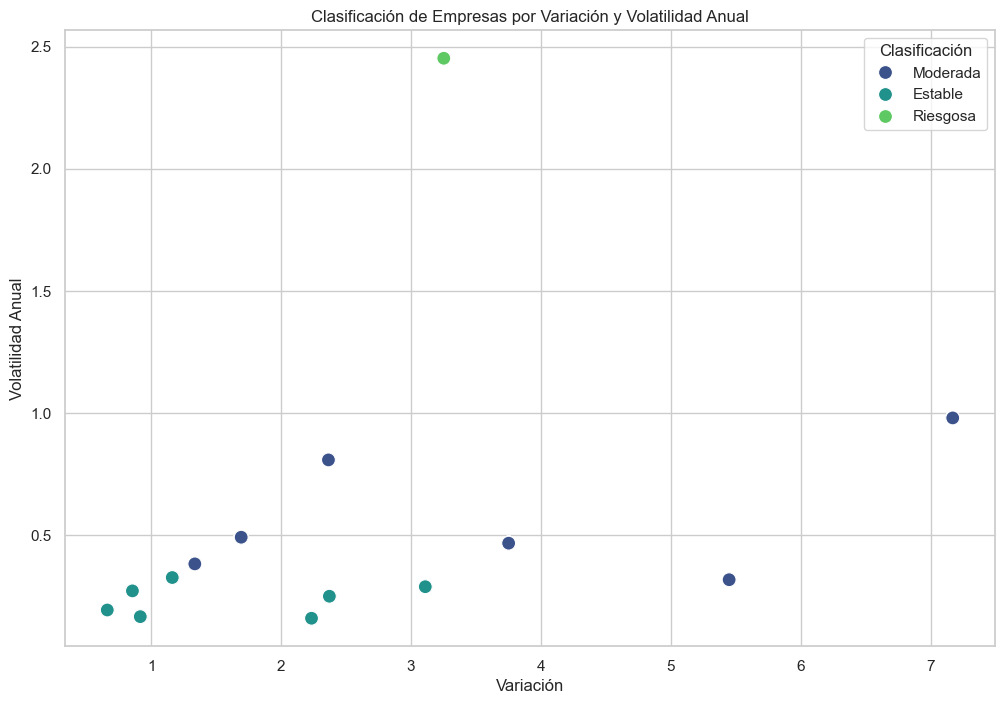

In [81]:
# Gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='variacion_y', y='volatilidad_anual', hue='clasificacion', palette='viridis', s=100)
plt.title('Clasificación de Empresas por Variación y Volatilidad Anual')
plt.xlabel('Variación')
plt.ylabel('Volatilidad Anual')
plt.legend(title='Clasificación')
plt.grid(True)
plt.show()


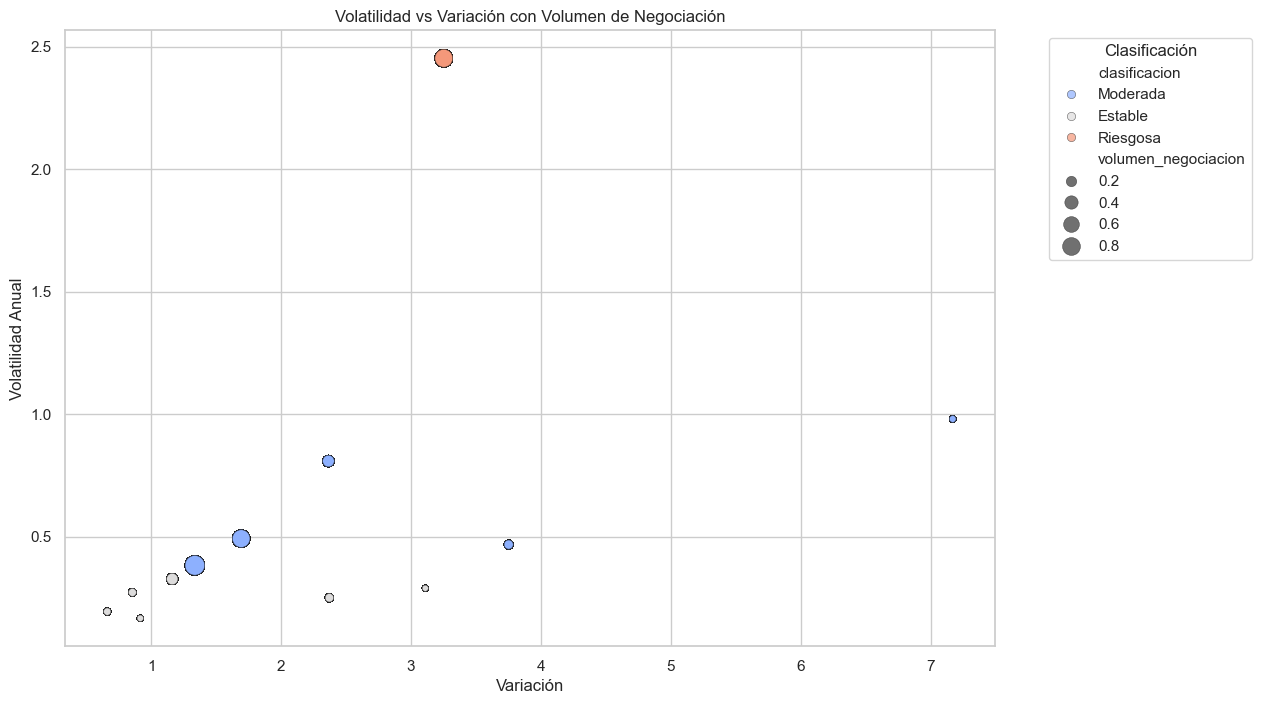

In [82]:
# Gráfico 4: Gráfico de dispersión (scatter) de volatilidad vs variación, con volumen como tamaño del punto
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='variacion_y', y='volatilidad_anual', size='volumen_negociacion', 
                          hue='clasificacion', sizes=(20, 200), palette='coolwarm', alpha=0.7, edgecolor='k')

plt.title('Volatilidad vs Variación con Volumen de Negociación')
plt.xlabel('Variación')
plt.ylabel('Volatilidad Anual')
plt.legend(title='Clasificación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

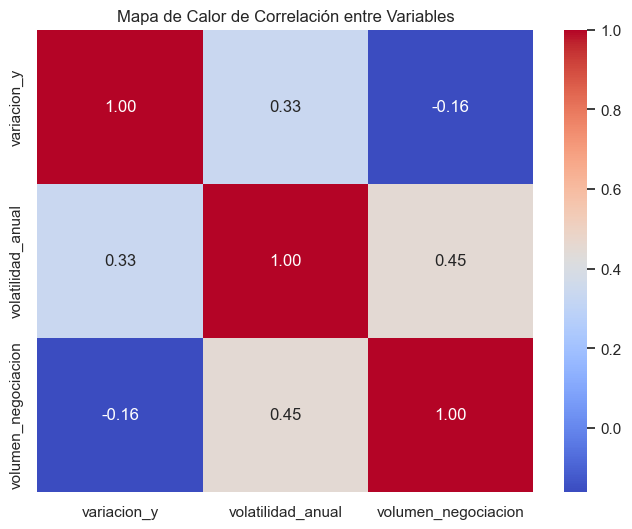

In [84]:
# Calcular la matriz de correlación
corr = df[['variacion_y', 'volatilidad_anual', 'volumen_negociacion']].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()
